In [1]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

os.chdir('G:\sources\AI_based_SE\AISE_fooling')

#from model import Model
import numpy as np
import torch
from torchvision.datasets import mnist

from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

FileNotFoundError: [Errno 2] No such file or directory: 'G:\\sources\\AI_based_SE\\AISE_fooling'

In [2]:
def show_image(arr):
    plt.imshow(arr, cmap='gray')
    plt.show()

# TEST
# show_image(torch.rand((28,28)))

In [3]:
def recovery_image(arr):
    rand_num = torch.rand((28,28))/4

    d = c[0][0] + rand_num
    d[d<1/4] = 0

    return torch.reshape(d, (1,1,28,28))
    show_image(d)

In [4]:
model_path = 'G:/sources/AI_based_SE/AISE_fooling/models/mnist_0.9893.pkl'
model = torch.load(model_path)

# Test MNIST test dataset

In [ ]:
%time
# Test MNIST dataset
batch_size = 1  #256
test_dataset = mnist.MNIST(root='./test', train=False, transform=ToTensor())
test_loader = DataLoader(test_dataset, batch_size=batch_size)

count = 0
for i, (a,b) in enumerate(test_loader):
    
    ## Normalize 1
    #c = torch.round(a)
    
    #show_image(c[0][0])
    #break
    
    ## Normalize 2
    normalization_size = 64
    c = a * 256 // normalization_size / (256/normalization_size)
    
    print(c[0][0].shape)
    show_image(c[0][0])
    break
    
    ## recover
    c = recovery_image(c)
    
    # Predict
    predict_y = model(c.float()).detach()
    predict_y = list(predict_y[0])
    
    if (predict_y.index(max(predict_y)) == b[0]):
        #print (f'{i}, {b} Correct')
        count += 1
    #else:
    #    print (f'{i}, {b} Wrong')
    
#     if i == 100:
#         break
    #break
print (f'{count / len(test_dataset)}%')

Wall time: 0 ns


C:\Users\Jangting\anaconda3\envs\fool\lib\site-packages\torch\_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  ..\aten\src\ATen\native\BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


torch.Size([28, 28])


In [86]:
# 3 level normalize
print (f'{count / len(test_dataset)}%')

0.9872%


In [88]:
# 2 level normalize (torch.round)
print (f'{count / len(test_dataset)}%')

0.9869%


In [90]:
# 4 level normalize (torch.round)
print (f'{count / len(test_dataset)}%')

0.9901%


In [92]:
# 8 level normalize (torch.round)
print (f'{count / len(test_dataset)}%')

0.9902%


# EA

In [17]:
import torch
import random
from tqdm import tqdm

In [18]:
def generate_initial_image():
    image_arr = torch.rand((28,28))
    image_arr = image_arr * 4 // 1 / 4
    image_arr = torch.reshape(image_arr, (1,1,28,28))
    return image_arr

In [19]:
# TODO : polynomial mutation operator

def mutate(image_arr, rate):
    for i in range(28):
        for j in range(28):
            if random.random() < rate:
                image_arr[0][0][i][j] = random.random()
    return image_arr

# TEST
# a = torch.zeros((28,28))
# print(mutation(a, 0.1)[0])

In [20]:
# TODO : 추가해야할 것 확인 및 코딩
def crossover():
    print("crossover")

In [21]:
# TODO : 해당 label의 확률 값 return

def fitness_function(image_arr, label):
    predict_y = model(image_arr.float()).detach()
    predict_y = list(predict_y[0])
    
    ## TODO!!
    if predict_y.index(max(predict_y)) != label:
        return False
    elif max(predict_y) < 0.9999:
        return False
    else:
        return True

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 788.47it/s]


iteration : 1000


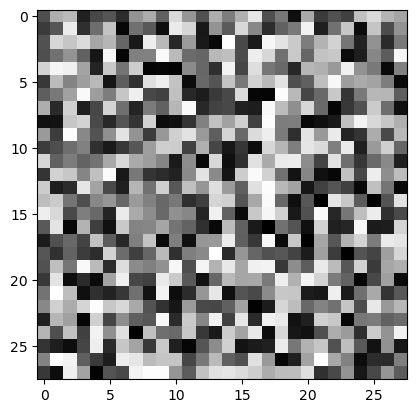

In [23]:
def main():
    iteration = 1000 #20000
    mutate_rate = 0.1
    mutate_rate_cutting_time = 1000
    
    label = 1
    
    image_arr = generate_initial_image()
    
    for i in tqdm(range(iteration)):
        if i == mutate_rate_cutting_time:
            mutate_rate = mutate_rate / 2
        mutate(image_arr, mutate_rate)
        
        if fitness_function(image_arr, label):
            break
        #break
    
    print(f'iteration : {iteration}')
    show_image(image_arr[0][0])
    
main()